In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(4)
import tensorflow as tf; tf.set_random_seed(4)
from mpl_toolkits.mplot3d import Axes3D

(200, 3)


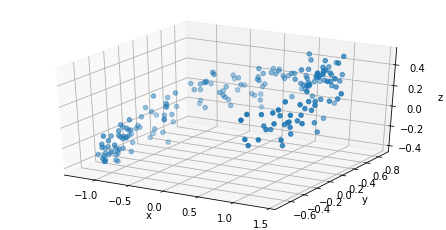

In [2]:
m = 200
w1, w2 = 0.1, 0.3
noise_level = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5 
  
data = np.empty((m, 3))
noise = noise_level * np.random.normal(size=(m,3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise[:, 0]
data[:, 1] = np.sin(angles) * 0.7 + noise[:, 1]
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise[:, 2]
print(data.shape)

fig = plt.figure(figsize=(6, 3))
ax = Axes3D(fig)  
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])
print(X_train.shape, X_test.shape)

(100, 3) (100, 3)


In [4]:
tf.reset_default_graph()

In [5]:
learning_rate = 0.01
n_iterations = 1000

In [6]:
n_inputs = 3
n_hidden = 2  # codings
n_outputs = n_inputs

In [7]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [9]:
g = tf.get_default_graph()
for op in g.get_operations():
    print(op.name)
print(g.get_tensor_by_name('dense/bias:0'))

Placeholder
dense/kernel/Initializer/random_uniform/shape
dense/kernel/Initializer/random_uniform/min
dense/kernel/Initializer/random_uniform/max
dense/kernel/Initializer/random_uniform/RandomUniform
dense/kernel/Initializer/random_uniform/sub
dense/kernel/Initializer/random_uniform/mul
dense/kernel/Initializer/random_uniform
dense/kernel
dense/kernel/Assign
dense/kernel/read
dense/bias/Initializer/zeros
dense/bias
dense/bias/Assign
dense/bias/read
dense/MatMul
dense/BiasAdd
dense_1/kernel/Initializer/random_uniform/shape
dense_1/kernel/Initializer/random_uniform/min
dense_1/kernel/Initializer/random_uniform/max
dense_1/kernel/Initializer/random_uniform/RandomUniform
dense_1/kernel/Initializer/random_uniform/sub
dense_1/kernel/Initializer/random_uniform/mul
dense_1/kernel/Initializer/random_uniform
dense_1/kernel
dense_1/kernel/Assign
dense_1/kernel/read
dense_1/bias/Initializer/zeros
dense_1/bias
dense_1/bias/Assign
dense_1/bias/read
dense_1/MatMul
dense_1/BiasAdd
Tensor("dense/bias:0

In [9]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [10]:
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    hidden_val = hidden.eval(feed_dict={X: X_test})

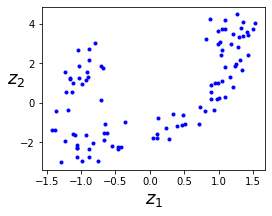

In [12]:
fig = plt.figure(figsize=(4,3))
plt.plot(hidden_val[:,0], hidden_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()